<a href="https://colab.research.google.com/github/choonhs/DS360/blob/master/Project_HR_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Breadcrumbs***
We all love snacks, and when we do get our hands on that cookie or handful of potato chips, we would happily munch away while walking from the pantry back to your workstation in the office. Sounds indeed like a normal thing to do, but do you know that trail you are leaving behind as you walk back? Breadcrumbs: something that we all take for granted. But under normal circumstances, besides being an annoyance to the cleaner, these breadcrumbs do not talk and tell people what they want to know about you intimately (unless you’re dealing with someone from the crime lab at CSI, but that’s a story for another time). However, have you ever wondered what if these breadcrumbs could tell people things that they would like to know about you if someone collects them and just looks at them, smells them or feels their textures?

Our activities in the modern-day organization, be it large or small, leave such breadcrumbs: digital breadcrumbs. More often than not, these breadcrumbs are tucked away in a spreadsheet or a database that not many people in the organization look at, and hence they are somewhat taken for granted or even forgotten, unless somebody needs to look up something about a particular someone. A lot of organizations out there still do not realize that the data in that tucked-away spreadsheet or database contains a lot of information which could potentially make us realize things that were not obvious which are critical to our human resources, and further prescribe what can be done in order to maintain our talent pool.

# ***Science of Human Resources***
Now is probably a good time to get rid of the thinking that science is science and human resources is an arts subject. By putting on the thinking cap of a data scientist, in a broad sense, we are then able to collect all the digital HR breadcrumbs, run them through some really interesting processes and finally produce meaningful information which is able to give the management a lot of valuable insights into what should be done next, or what should be discontinued in order to keep the talent pool in good shape and avoid disasters such as top talent attrition or even bad press on social media.

For the purposes of this article, the subject of interest would be factors that impact **attrition** (i.e. employees leaving the company). The sample dataset that will be used for the purposes of this article was obtained from [Kaggle.com](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset), and the tool that will be used are probably no stranger to anyone who has done data science at some point of their life - Python (which in this case is administered through Google Colab), which will be illustrated throughout the course of this article.

# ***Getting Everything Ready***
The first thing that needs to be done, as with all projects that involve Python, is to load all the required data libraries, such as **pandas, numpy, seaborn** and **matplotlib** in this case. These libraries allow the user to perform a variety of functions and operations on the dataset, which we will load after this step. 

In [0]:
#Load required Python libraries

%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()

With the libraries loaded, the next step is to load the dataset (which is stored in GitHub) into Python and to notate the dataset as "df". This utilizes the pandas library which we loaded earlier (as can be seen in the "df = pd.read_csv" code). Once the dataset is loaded, we can find out what the dataset looks like by using the "df.head(10)" code to display the first 10 lines of the dataset.

In [16]:
#Load HR dataset

df = pd.read_csv("https://raw.githubusercontent.com/choonhs/DS360/master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,AttrCode,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,OTCode,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,0,13,3,2,80,2,17,3,2,7,7,7,7


The code "df.info" can be executed to further display a summary of the columns in the dataset, as well as the number of data rows and the data-type of its contents. In this case, the dataset contains 1,470 rows, all of which are non-null (i.e. a fully populated dataset with no empty cells). The contents of each column could either be an integer (number), or an object (text).

In [17]:
#Display info on HR dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   AttrCode                  1470 non-null   int64 
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

# ***Correlations***
There are 37 columns in this dataset, each containing data on employees' job role/level, years of experience, their remuneration, performance rating as well as their scoring for various aspects of work (such as their satisfaction with their environment, job and relationships) and other personal details such as gender, age and distance of the office from their home.

It is useful to have a glimpse into how correlated the various columns are with each other, and this can be done by using the following code (which draws on the seaborn and matplotlib libraries that were loaded earlier). Based on the output, the columns that are positively/negatively correlated with each other can be seen. Some of these correlations are very obvious (e.g. Age with Total Working Years). However, in line with the main topic of interest, the correlation of columns vis-a-vis Attrition Code ("AttrCode") would need to be observed.

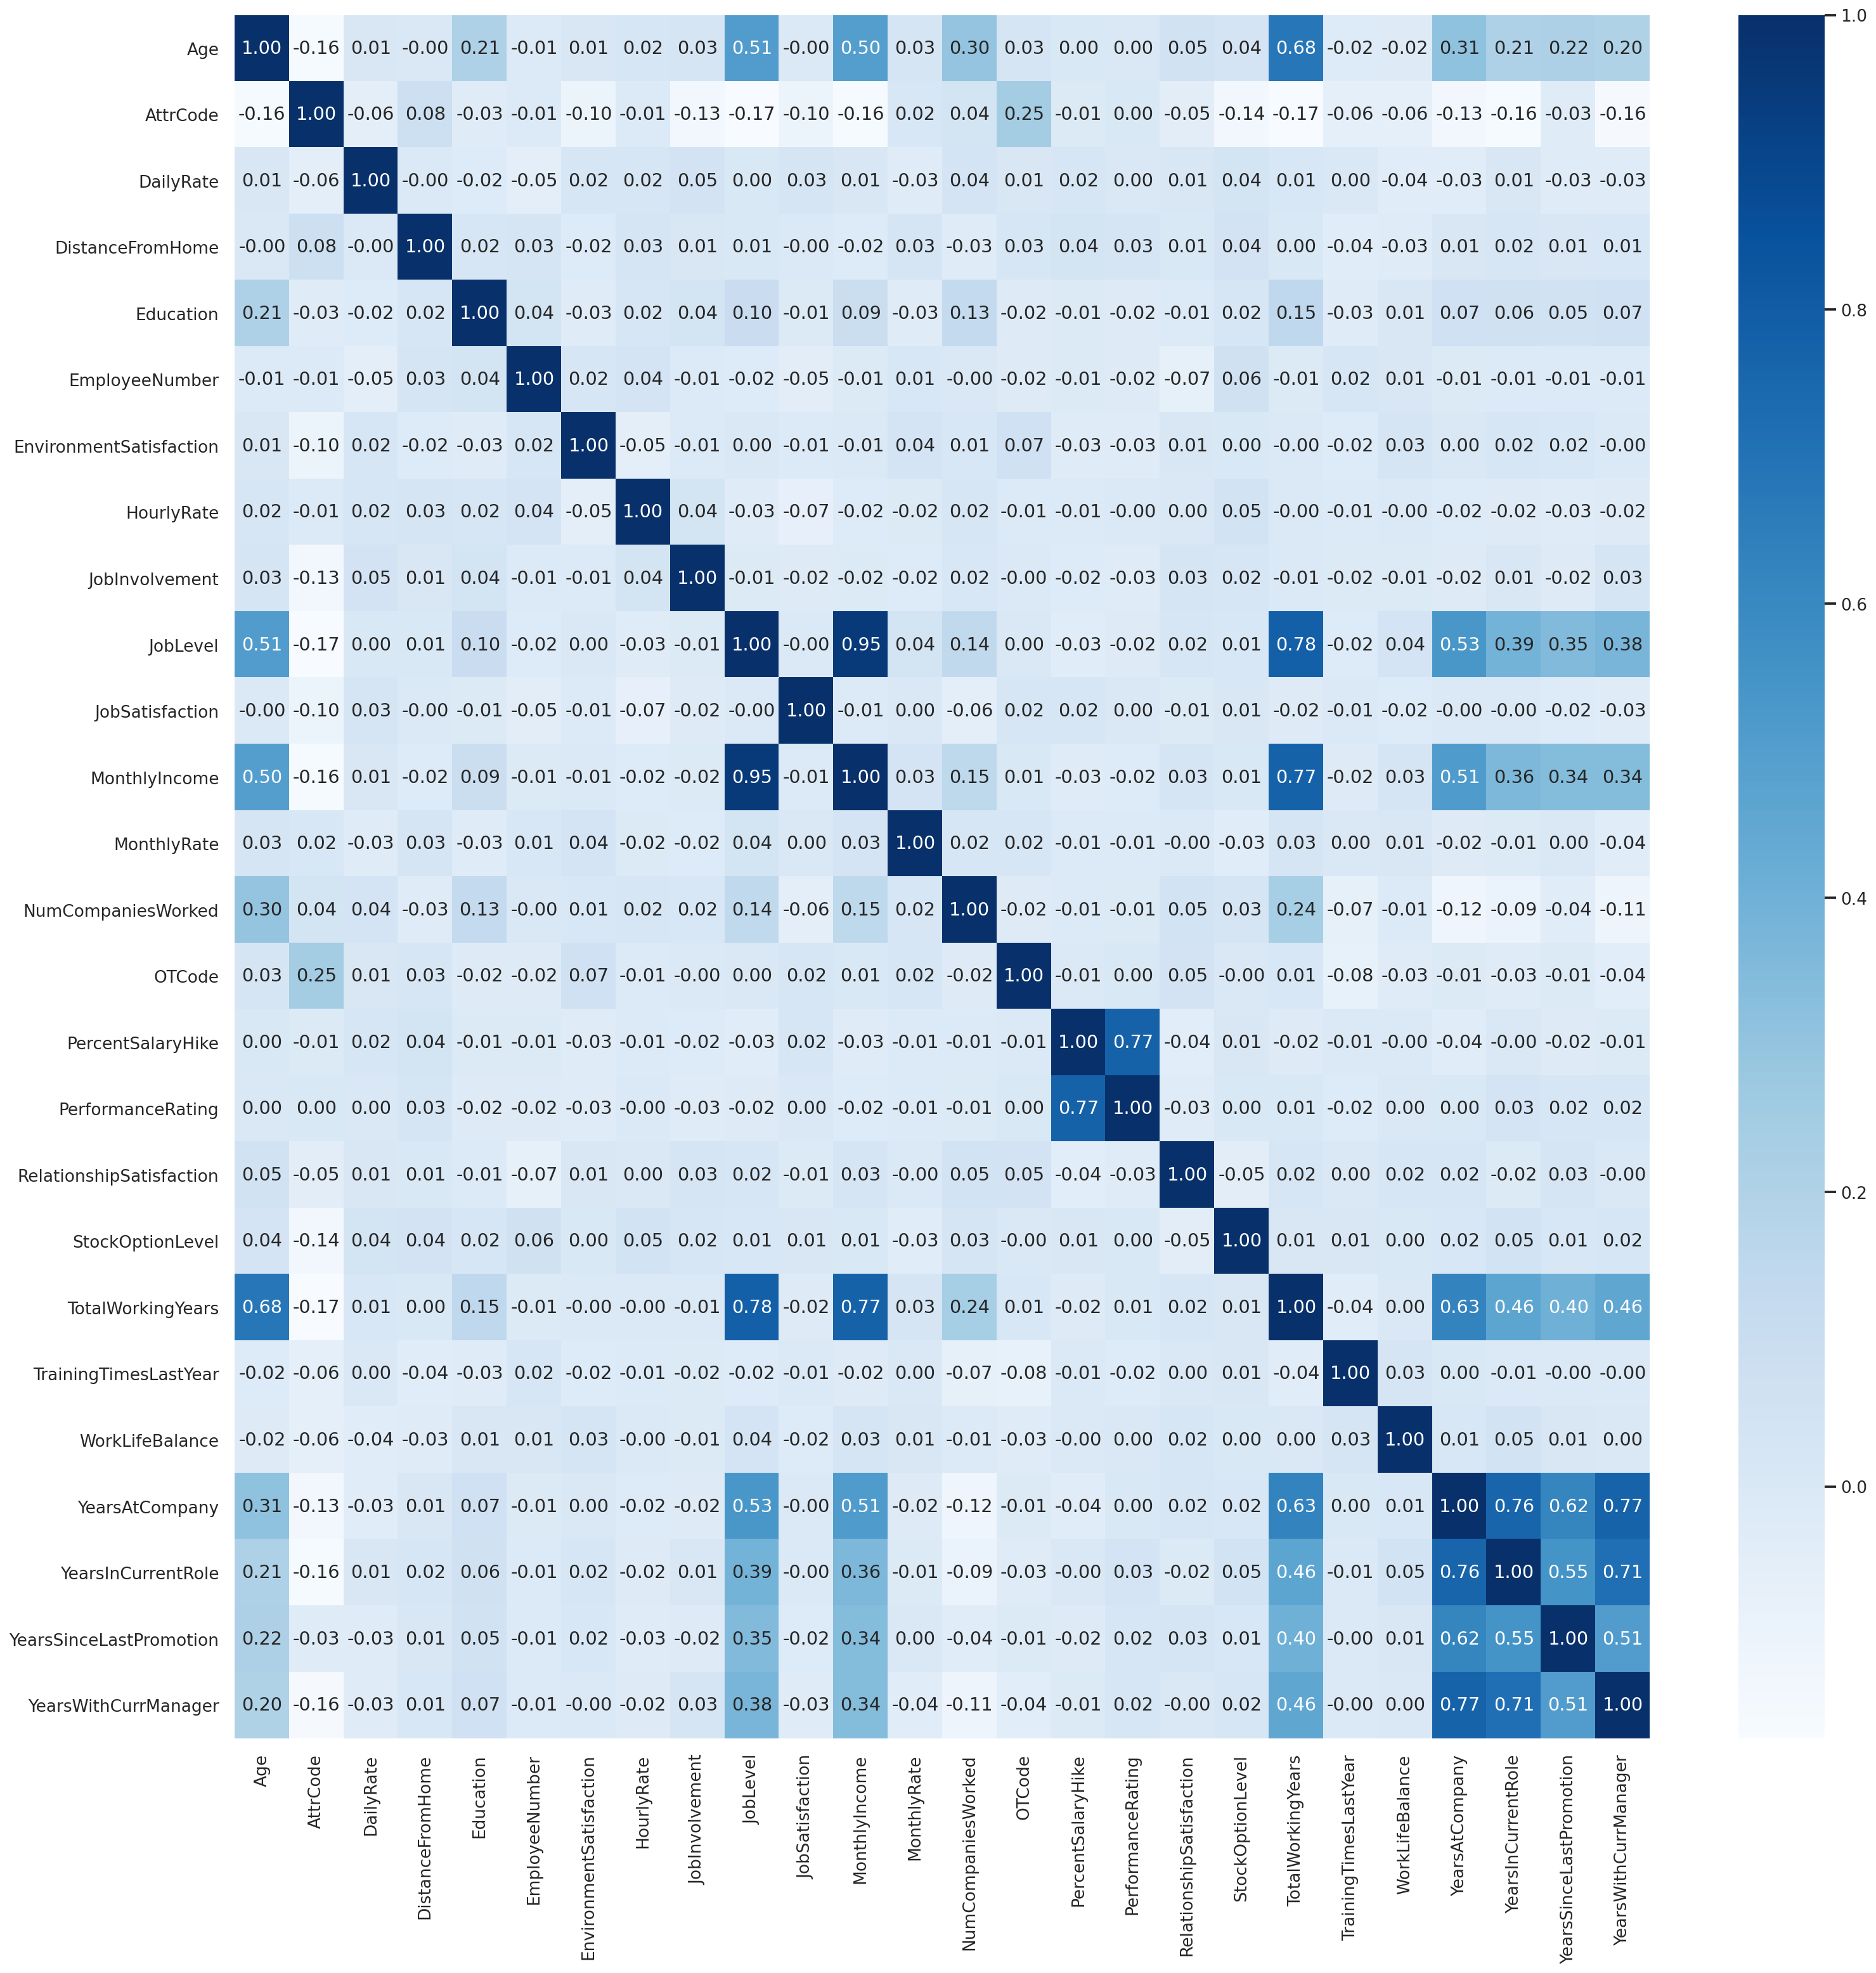

In [18]:
#Compute correlations between the various columns in HR dataset

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("talk", font_scale=0.8)

corr_df = df.corr()
heatmap_df = corr_df.drop(["EmployeeCount","StandardHours"]).drop(["EmployeeCount","StandardHours"], axis=1)

sns.heatmap(heatmap_df, cmap='Blues', annot=True, fmt=".2f")

# ***Descriptive Statistics***
Besides correlation, it is also useful to get a sense of the descriptive statistics of the dataset. This enables the analyst to understand the means (i.e. averages) of the various data columns as well as their relative spread around the means. This can be done using the "df.describe()" code.

(Reminder: "df" is what the dataset is notated as, and the "describe()" code is used to bring up the descriptive statistics of the dataset).

In [19]:
#Display descriptive statistics on HR dataset

df.describe()

,Age,AttrCode,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OTCode,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# ***Data Plots***
Pictures can paint a thousand words, so we are taught. It is therefore useful to view the data in the form of plot diagrams, graphs or charts. The following section dfetails out how to produce informative data charts from our dataset using the seaborn and matplotplib libraries in Python. The example given here is a bar chart detailing the number of employees in each department within the organization.

The 'Department' column indicated below can be changed to any other data column (such as Gender, Job Role, or Business Travel).

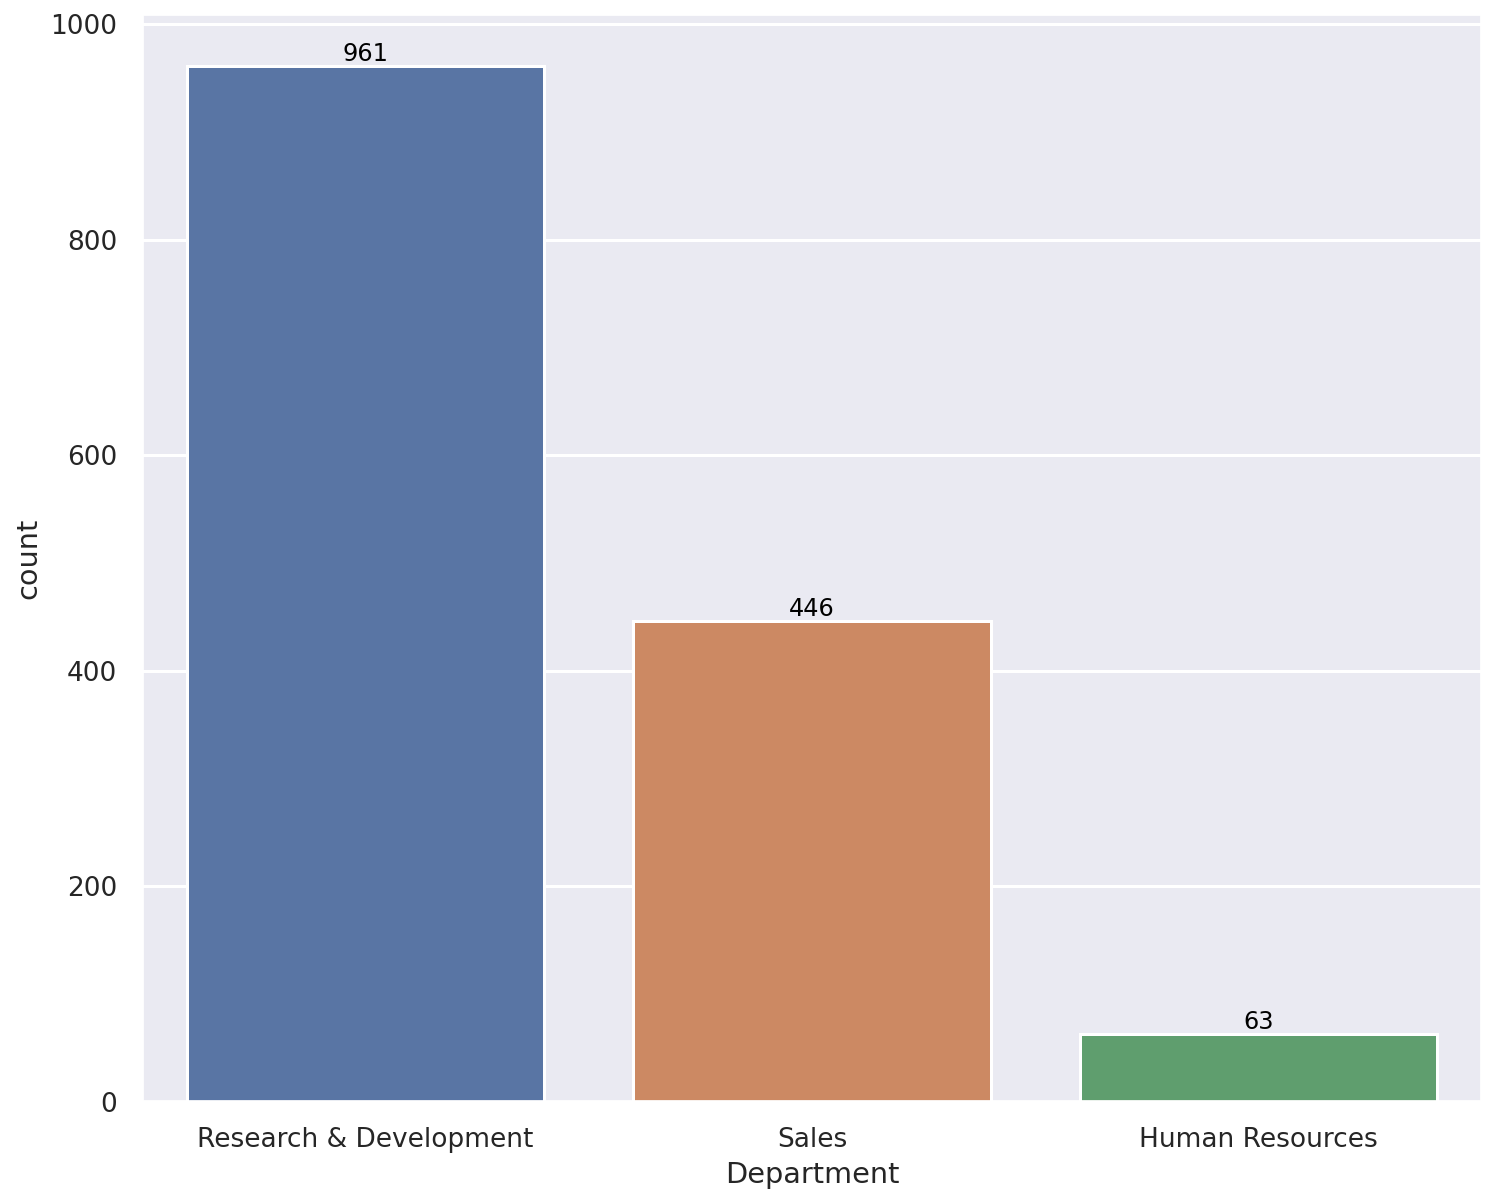

In [20]:
# Draw a bar chart that shows the count of employees per department

sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=0.8)

ax = sns.countplot(df['Department'], order = df['Department'].value_counts().index)
loc, labels = plt.xticks()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xticklabels(labels);

# ***Data Grouping***
There are also times where viewing data grouped by a certain criteria can be useful. The following example groups some of the data in the dataset by Job Role - this may be useful to understand the different properties of the various job roles in the organization, such as their average income level, average age, total working years etc.

Note that the dataset does not explicitly have a column called Average Monthly Work Hours - this has to be calculated by dividing each row's Monthly Rate by the Hourly Rate (in order to get a gauge of that personnel's hours worked every month). The first part of the codes displayed below details how to create this computation and subsequently store it as a 'new column' within the dataset (again, notated by 'df').

In [21]:
#Compute Average Monthly Working Hours as "AverageMonthlyWorkHours" and storing it into a new column within df.
AvgMthHrs = df['MonthlyRate'] / df['HourlyRate']
df["AverageMonthlyWorkHours"] = AvgMthHrs

#Find out average monthly income, age, average monthly work hours and total working years for employees grouped by Job Role, and storing it in 'avges_jobrole'.
avges_jobrole = df.groupby(["JobRole"]).agg(
    Average_Monthly_Income = ("MonthlyIncome", 'mean'),
    Average_Age = ("Age", 'mean'),
    Average_Monthly_WorkHours = ("AverageMonthlyWorkHours", 'mean'),
    Average_Total_Working_Years = ("TotalWorkingYears", 'mean')
    ).round(2)
avges_jobrole = avges_jobrole.reset_index()
avges_jobrole

,JobRole,Average_Monthly_Income,Average_Age,Average_Monthly_WorkHours,Average_Total_Working_Years
0,Healthcare Representative,7528.76,39.81,247.03,14.07
1,Human Resources,4235.75,35.50,236.22,8.17
2,Laboratory Technician,3237.17,34.10,233.08,7.66
3,Manager,17181.68,46.76,259.49,24.55
4,Manufacturing Director,7295.14,38.30,249.26,12.79
5,Research Director,16033.55,44.00,270.28,21.40
6,Research Scientist,3239.97,34.24,230.51,7.72
7,Sales Executive,6924.28,36.89,247.58,11.10
8,Sales Representative,2626.00,30.36,246.44,4.67


From the data grouped by Job Role above, it is also possible to plot out some charts to show a graphical representation of the data. For example, the codes below are for plotting an Average Monthly Income by Job Role bar chart.

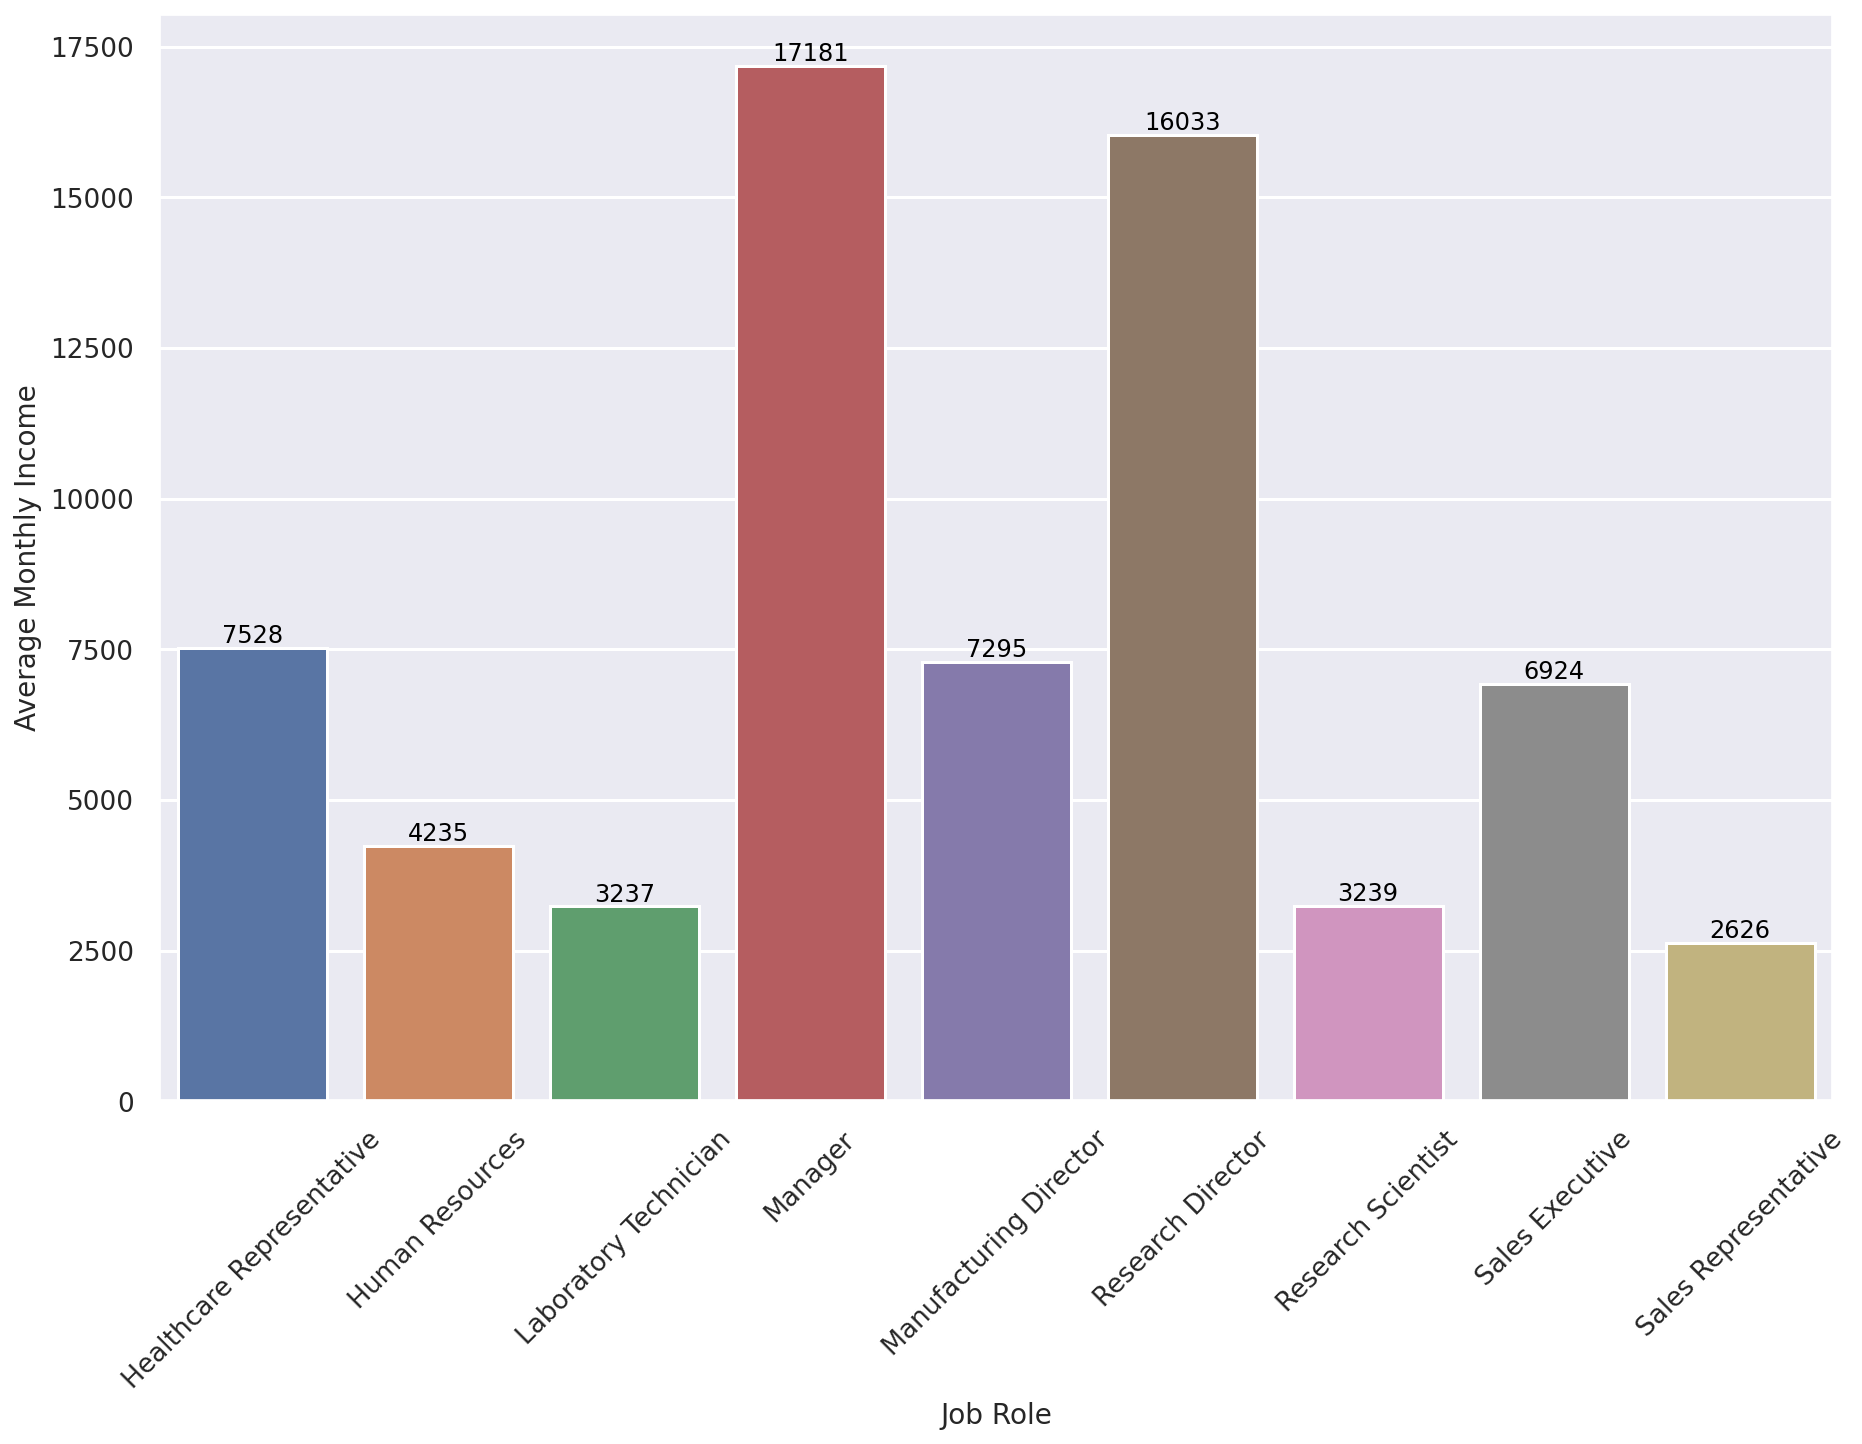

In [22]:
#Plot Average Monthly Income by Job Role using the avges_jobrole data set created above

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("talk", font_scale=0.8)

ax = sns.barplot(x="JobRole", y="Average_Monthly_Income", data=avges_jobrole, ci=None)
loc, labels = plt.xticks(rotation=45)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.ylabel("Average Monthly Income", size=14)
plt.xlabel("Job Role", size=14)

ax.set_xticklabels(labels);

# ***More Data Plots***
This next example shows how to plot out a histogram which shows the distribution of the employees's age in the organization. From the histogram, it can be concluded that employee's age follow a distribution that somewhat resembles a normal distribution.

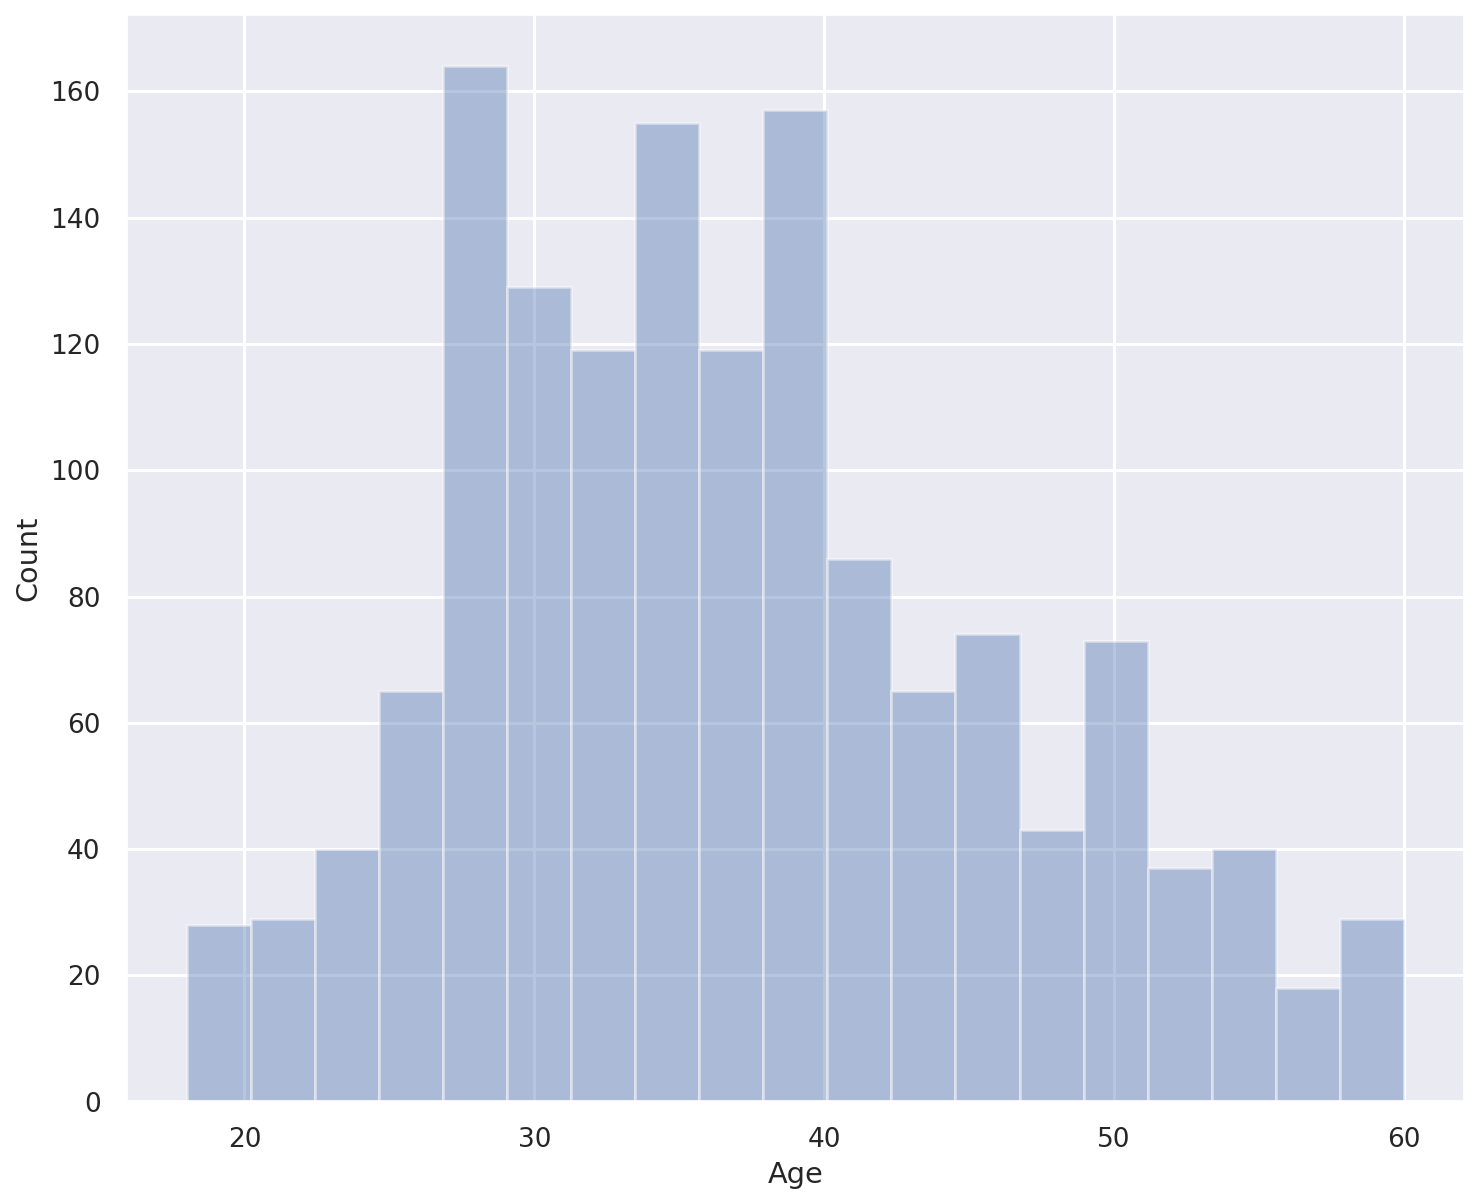

In [23]:
# Draw a histogram of the ages of employees still in the company

sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=0.8)
sns.distplot(df['Age'], norm_hist=False, kde=False)
plt.xlabel("Age")
plt.ylabel("Count");

# ***Data Plots - Attrition Factors***
Returning to the main topic at hand, namely factors that are correlated to attrition, the following two code cells below show how to plot the graphs of various data columns with a split between employees that are still with the company (i.e. AttrCode = 0) and employees that have left (i.e. AttrCode = 1). An examination of the data charts below will reveal certain data columns that seem to have a correlation with attrition. For example, the Stock Option Level chart shows that employees with lower Stock Option Levels tend have higher levels of attrition. Another example would be the Years In Current Role chart, which seem to show that attrition rates are higher in employees who are relatively new in the current role.

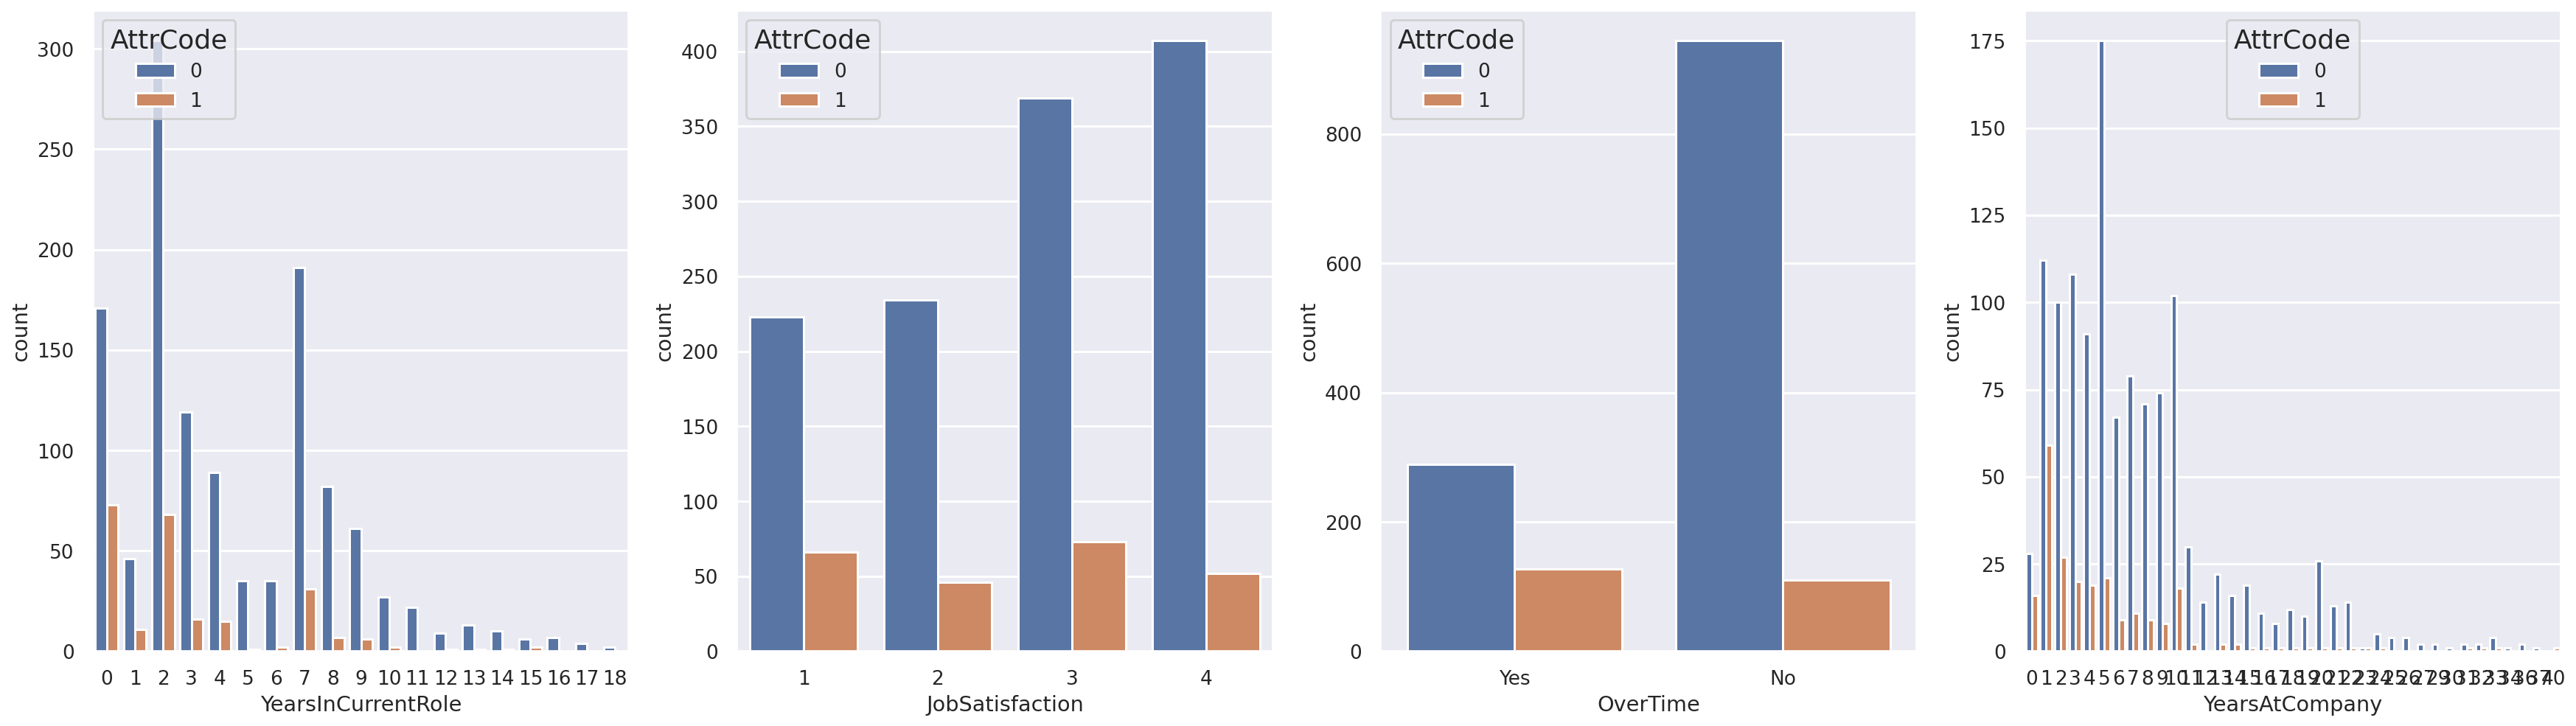

In [53]:
#Plot diagrams for various factors vs Attrition to see visual relationship

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(30,8))
sns.countplot(x="YearsInCurrentRole", hue="AttrCode", data=df, ax=ax1);
sns.countplot(x="JobSatisfaction", hue="AttrCode", data=df, ax=ax2);
sns.countplot(x="OverTime", hue="AttrCode", data=df, ax=ax3);
sns.countplot(x="YearsAtCompany", hue="AttrCode", data=df, ax=ax4);

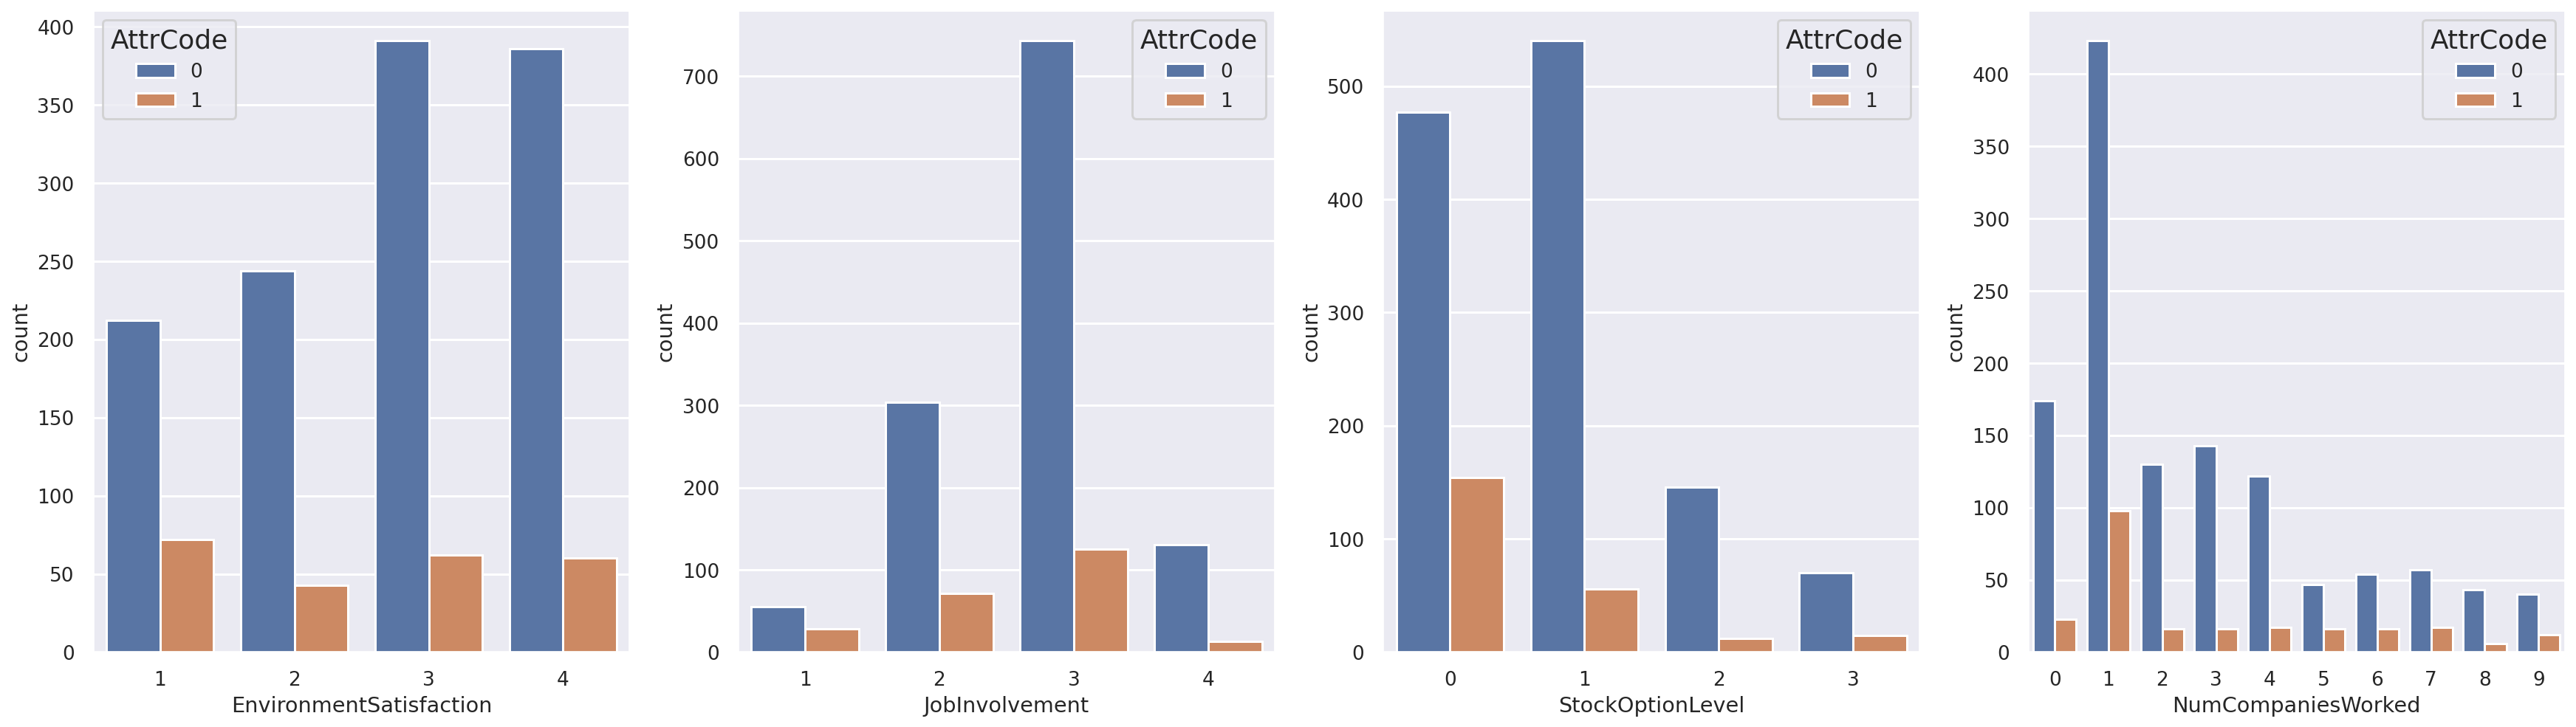

In [25]:
fig, (ax5, ax6, ax7, ax8) = plt.subplots(1,4,figsize=(30,8))
sns.countplot(x="EnvironmentSatisfaction", hue="AttrCode", data=df, ax=ax5);
sns.countplot(x="JobInvolvement", hue="AttrCode", data=df, ax=ax6);
sns.countplot(x="StockOptionLevel", hue="AttrCode", data=df, ax=ax7);
sns.countplot(x="NumCompaniesWorked", hue="AttrCode", data=df, ax=ax8);

# ***Logistical Regression***
The data diagrams above are able to give a sense of correlation between the various data columns and attrition. The more definitive method of determining the columns that are correlated with attrition is by means of regression analysis. By taking "AttrCode" as the dependent variable and performing a regression against the other data columns as the independent variables, this regression analysis evaluates how strong the correlation between the dependent and independent variables are, and how good a fit the regression model is as a whole in explaining the variations in the dataset. Since the dependent variable "AttrCode" is binary in nature (i.e. has only a value of 0 of 1), the **Logistical Regression** method is used (instead of the usual Linear Regression method).

A good first step would be to model AttrCode against all the quantitative data columns. Following that, based on the results of the regression analysis, the data columns which give a p-value (i.e. P>|z|) of more than 0.05 are texcluded and the regression analysis is rerun. Mathematically, this ensures that we include variables that are statistically significant (the 5% level is commonly used. Refer to this article from [Harvard Business Review](https://hbr.org/2016/02/a-refresher-on-statistical-significance) for further reading on Statistical Significance).

For this Logistical Regression analysis, the **statsmodels** library would need to be imported into Python. This library is used to perform the logisticall regression modelling, as well as to assess the model's goodness of fit.


In [49]:
#Perform Logit Regression Analysis to determine significance of various factors versus Attrition likelihood

import statsmodels.api as sm

y = df['AttrCode']
X = df[['DistanceFromHome', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
         'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked',
         'OTCode', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'TotalWorkingYears']]

logmodel_pd = sm.Logit(y,X)
result = logmodel_pd.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.343416
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               AttrCode   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1456
Method:                           MLE   Df Model:                           13
Date:                Fri, 15 May 2020   Pseudo R-squ.:                  0.2225
Time:                        07:02:43   Log-Likelihood:                -504.82
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.939e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DistanceFromHome             0.0390      0.010      4.038      0.000       0.020       0.058
PercentSalaryHike           -0.0733      0.033     -2.204      0.028      -0.139      -0.008
PerformanceRating            0.9272      0.232      3.997      0.000       0.473       1.382
RelationshipSatisfaction    -0.1976      0.074     -2.687      0.007      -0.342      -0.053
JobInvolvement              -0.4677      0.106     -4.422      0.000      -0.675      -0.260
EnvironmentSatisfaction     -0.3278      0.072     -4.537      0.000      -0.469      -0.186
JobSatisfaction             -0.2961      0.071     -4.178      0.000      -0.435      -0.157
NumCompaniesWorked           0.1599      0.034      4.732      0.000       0.094       0.226
OTCode                       1.6889      0.169      9.990      0.000       1.358       2.020
StockOptionLevel            -0.5550      0.106     -5.257      0.000      -0.762      -0.348
YearsAtCompany               0.1199      0.032      3.730      0.000       0.057       0.183
YearsInCurrentRole          -0.1171      0.041     -2.836      0.005      -0.198      -0.036
YearsWithCurrManager        -0.0937      0.042     -2.227      0.026      -0.176      -0.011
TotalWorkingYears           -0.1160      0.020     -5.894      0.000      -0.155      -0.077
============================================================================================
"""

# ***Prediction***
The Logistical Regression above gives us the variables (i.e. data columns) that are statistically significant in terms of their correlation with the likelihood of attrition. This therefore gives us a very powerful machine learning tool which we can use to predict, with a certain degree of accuracy, if an employee will leave the organization. For this purpose, the **sklearn** library will be loaded into Python.

For this exercise, taking all the variables from the Logistical Regression Analysis above will result in an accuracy score of 0.8653. Interestingly, removing Percent Salary Hike and Years With Current Manager (with these two variables having the highest P-values, albeit below 0.03) increases the accuracy score by 14 basis points to 0.8667. As such, these two variables will be excluded for the purposes of making predictions.

In [60]:
#Compute predictive accuracy of Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

columns = ['DistanceFromHome', 'PerformanceRating', 'RelationshipSatisfaction',
         'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked',
         'OTCode', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole',
         'TotalWorkingYears']
X = df[columns]
y = df['AttrCode']

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X,y)

predictions = logmodel.predict(X)

accuracy_score(y, predictions)

0.8666666666666667

Once the accuracy score of the Logistic Regression above has been fine tuned to be as high as practically possible, the predictions can therefore be run. A second dataset (which is stored using the notation "predict") for the purposes of predictions is loaded and the predictions are done (based on the model above) and included as a new column to this dataset. The outcomes of the predictions are stored in a new rightmost column of the dataset.

In [55]:
#Predict attrition of a list of staff members based on their information

predict = pd.read_csv("https://raw.githubusercontent.com/choonhs/DS360/master/WA_Fn-UseC_-HR-Employee-PredictAttrition.csv")

X_predict = predict[columns]

predictions = logmodel.predict(X_predict)

predict['left_predict'] = predictions

predict

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,OTCode,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left_predict
0,46,Travel_Rarely,945,Human Resources,5,2,Medical,1,10001,3,Male,80,2,2,Human Resources,2,Divorced,5021,10425,8,Y,Yes,0,22,4,4,80,1,16,2,3,4,2,0,2,0
1,37,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,10002,2,Male,63,2,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,1,22,4,4,80,0,7,3,3,3,2,0,2,1
2,59,Non-Travel,1420,Human Resources,2,4,Human Resources,1,10003,3,Female,32,4,5,Manager,4,Married,18844,21922,9,Y,No,0,21,4,4,80,2,30,3,3,3,2,2,2,0
3,54,Non-Travel,142,Human Resources,26,3,Human Resources,1,10004,4,Female,30,1,4,Manager,4,Single,17328,13871,5,Y,Yes,1,12,3,3,80,0,23,3,3,5,3,4,4,0
4,26,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,10005,1,Female,61,2,1,Human Resources,3,Married,2942,8916,1,Y,No,0,23,4,4,80,1,2,3,3,8,7,5,7,0
5,30,Travel_Rarely,1240,Human Resources,9,3,Human Resources,1,10006,3,Male,48,4,2,Human Resources,4,Married,6347,13982,5,Y,Yes,1,19,3,4,80,0,12,2,1,11,9,4,7,0
6,59,Travel_Rarely,818,Human Resources,6,2,Medical,1,10007,2,Male,52,3,1,Human Resources,3,Married,2267,25657,8,Y,No,0,17,3,4,80,1,7,2,2,2,2,2,2,0
7,31,Travel_Rarely,106,Human Resources,2,3,Human Resources,1,10008,1,Male,62,1,2,Human Resources,1,Married,6410,17822,3,Y,No,0,12,3,4,80,0,9,1,3,2,2,1,0,0
8,42,Travel_Rarely,544,Human Resources,2,1,Technical Degree,1,10009,3,Male,52,3,1,Human Resources,3,Divorced,2696,24017,5,Y,Yes,1,11,3,3,80,1,4,5,3,3,2,1,0,0
9,19,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,10010,2,Male,52,2,1,Human Resources,4,Single,2564,18437,1,Y,No,0,12,3,3,80,0,1,3,4,1,0,0,0,0


The predictions done above can be saved as a CSV file into the local hard-drive with the following code.

In [0]:
#Export prediction as csv file

predict.to_csv(r'WA_Fn-UseC_-HR-Employee-Attrition-PredictAccuracy.csv', index=False, header=True)
from google.colab import files
files.download("WA_Fn-UseC_-HR-Employee-Attrition-PredictAccuracy.csv")